In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('df_audio_features_1000')


In [101]:
df['name_art_id']=df['name']+df['artist']+df['id']


In [107]:
df.set_index('name_art_id', inplace=True)

In [108]:
df.drop(columns=['name','artist','type', 'id', 'html'], inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA to Ravel: Boléro, M. 81Maurice Ravel7E1ErYYCn0lYjHODZ1qGuB
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1440 non-null   float64
 1   energy            1440 non-null   float64
 2   key               1440 non-null   int64  
 3   loudness          1440 non-null   float64
 4   mode              1440 non-null   int64  
 5   speechiness       1440 non-null   float64
 6   acousticness      1440 non-null   float64
 7   instrumentalness  1440 non-null   float64
 8   liveness          1440 non-null   float64
 9   valence           1440 non-null   float64
 10  tempo             1440 non-null   float64
 11  duration_ms       1440 non-null   int64  
 12  time_signature    1440 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 157.5+ KB


In [110]:
df.describe()

danceability       energy          key     loudness         mode  \
count   1440.000000  1440.000000  1440.000000  1440.000000  1440.000000   
mean       0.538917     0.494241     5.154861   -11.098032     0.663194   
std        0.219193     0.281917     3.540932     6.979107     0.472782   
min        0.059600     0.000020     0.000000   -44.406000     0.000000   
25%        0.386000     0.243000     2.000000   -14.927250     0.000000   
50%        0.562000     0.529500     5.000000    -8.939500     1.000000   
75%        0.710250     0.733000     8.000000    -5.677250     1.000000   
max        0.964000     0.996000    11.000000     1.085000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1440.000000   1440.000000       1440.000000  1440.000000  1440.000000   
mean      0.086273      0.469774          0.188482     0.174391     0.472576   
std       0.086193      0.374637          0.336594     0.146007     0.287807   
min       0.023200      0.000002          0.000000     0.020700     0.019600   
25%       0.038400      0.083025          0.000000     0.090700     0.214750   
50%       0.048200      0.419000          0.000127     0.118000     0.476500   
75%       0.088825      0.869250          0.159750     0.203000     0.720000   
max       0.576000      0.996000          0.985000     0.985000     0.985000   

             tempo   duration_ms  time_signature  
count  1440.000000  1.440000e+03     1440.000000  
mean    115.249066  2.912083e+05        3.889583  
std      31.611805  2.280920e+05        0.446937  
min      49.689000  6.275800e+04        1.000000  
25%      91.014250  1.930300e+05        4.000000  
50%     110.008000  2.336965e+05        4.000000  
75%     135.587000  3.080625e+05        4.000000  
max     206.313000  3.815787e+06        5.000000

In [122]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [56]:
q1=df.quantile(0.25)
q1

danceability             0.386000
energy                   0.243000
key                      2.000000
loudness               -14.927250
mode                     0.000000
speechiness              0.038400
acousticness             0.083025
instrumentalness         0.000000
liveness                 0.090700
valence                  0.214750
tempo                   91.014250
duration_ms         193030.000000
time_signature           4.000000
Name: 0.25, dtype: float64

In [57]:
q3=df.quantile(0.75)
q3


danceability             0.710250
energy                   0.733000
key                      8.000000
loudness                -5.677250
mode                     1.000000
speechiness              0.088825
acousticness             0.869250
instrumentalness         0.159750
liveness                 0.203000
valence                  0.720000
tempo                  135.587000
duration_ms         308062.500000
time_signature           4.000000
Name: 0.75, dtype: float64

In [88]:
IQR=q3-q1
IQR

danceability             0.324250
energy                   0.490000
key                      6.000000
loudness                 9.250000
mode                     1.000000
speechiness              0.050425
acousticness             0.786225
instrumentalness         0.159750
liveness                 0.112300
valence                  0.505250
tempo                   44.572750
duration_ms         115032.500000
time_signature           0.000000
dtype: float64

In [93]:
not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

In [113]:
not_outliers# there is no outliers here

danceability   energy  key  loudness  mode  \
id                                                                   
5ueyLj6e6oVaTY0KQ6yLaA        0.6240  0.46800   10   -12.162     1   
3aEJMh1cXKEjgh52claxQp        0.5850  0.24700    1   -12.612     1   
307XEC1IUwUs9ojlEFwH7f        0.2900  0.22700    3   -13.060     1   
5yQ9iMZXGcr5rlO4hoLsP4        0.5400  0.68100    4    -5.440     1   
3vFVS2WYHDG4KkWCNecvpn        0.4550  0.16700    0   -13.613     1   
...                              ...      ...  ...       ...   ...   
1aEhYlZtypmipA06SDJ4U3        0.2020  0.06940    3   -23.390     1   
1Gfqe7TAKklmuZf6hxsH6h        0.1880  0.10100    6   -21.873     1   
2XNwnFrdMDpismp0VUZ7cU        0.0596  0.00093    9       NaN     1   
7ucDwgMtE3YJtEfTbuRhy0        0.1330  0.02080    4       NaN     1   
7E1ErYYCn0lYjHODZ1qGuB        0.3540  0.04870    5   -24.568     1   

                        speechiness  acousticness  instrumentalness  liveness  \
id                                                                              
5ueyLj6e6oVaTY0KQ6yLaA       0.1320         0.881          0.000006    0.1440   
3aEJMh1cXKEjgh52claxQp       0.0400         0.452          0.000009    0.1070   
307XEC1IUwUs9ojlEFwH7f       0.0311         0.944          0.000079       NaN   
5yQ9iMZXGcr5rlO4hoLsP4       0.0508         0.808          0.000000    0.1620   
3vFVS2WYHDG4KkWCNecvpn       0.0739         0.918          0.000000    0.1730   
...                             ...           ...               ...       ...   
1aEhYlZtypmipA06SDJ4U3       0.0473         0.917               NaN    0.0832   
1Gfqe7TAKklmuZf6hxsH6h       0.0442         0.855               NaN    0.0694   
2XNwnFrdMDpismp0VUZ7cU       0.0434         0.951               NaN    0.0772   
7ucDwgMtE3YJtEfTbuRhy0       0.0419         0.883               NaN    0.1110   
7E1ErYYCn0lYjHODZ1qGuB       0.0323         0.783               NaN    0.2840   

                        valence    tempo  duration_ms  time_signature  
id                                                                     
5ueyLj6e6oVaTY0KQ6yLaA   0.9520   74.139     117080.0             4.0  
3aEJMh1cXKEjgh52claxQp   0.5910  127.150     223760.0             4.0  
307XEC1IUwUs9ojlEFwH7f   0.2240  114.278     157293.0             4.0  
5yQ9iMZXGcr5rlO4hoLsP4   0.7940   88.385     307053.0             4.0  
3vFVS2WYHDG4KkWCNecvpn   0.4040   76.118     185067.0             4.0  
...                         ...      ...          ...             ...  
1aEhYlZtypmipA06SDJ4U3   0.0655   87.906          NaN             4.0  
1Gfqe7TAKklmuZf6hxsH6h   0.0355   83.134          NaN             4.0  
2XNwnFrdMDpismp0VUZ7cU   0.0344   71.573     238187.0             NaN  
7ucDwgMtE3YJtEfTbuRhy0   0.0591   67.109     314307.0             4.0  
7E1ErYYCn0lYjHODZ1qGuB   0.2530   64.120          NaN             NaN  

[1440 rows x 13 columns]

In [123]:
df.drop(columns='duration_ms', inplace=True)

In [133]:
from sklearn.preprocessing import MinMaxScaler

# What does it mean fit_transform?
df_sk_pre = MinMaxScaler().fit_transform(df)
music_tab=pd.DataFrame(df_sk_pre, columns=df.columns, index=df.index)

In [141]:
music_tab.head()

danceability    energy  \
name_art_id                                                                  
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA         0.624060  0.469869   
I've Got You Under My Skin - Remastered 1998Fra...      0.580938  0.247977   
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...      0.254755  0.227896   
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...      0.531181  0.683728   
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...      0.437196  0.167654   

                                                         key  loudness  mode  \
name_art_id                                                                    
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA     0.909091  0.708800   1.0   
I've Got You Under My Skin - Remastered 1998Fra...  0.090909  0.698907   1.0   
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...  0.272727  0.689059   1.0   
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...  0.363636  0.856565   1.0   
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...  0.000000  0.676903   1.0   

                                                    speechiness  acousticness  \
name_art_id                                                                     
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA        0.196816      0.884538   
I've Got You Under My Skin - Remastered 1998Fra...     0.030391      0.453814   
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...     0.014291      0.947791   
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...     0.049928      0.811245   
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...     0.091715      0.921687   

                                                    instrumentalness  \
name_art_id                                                            
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA             0.000006   
I've Got You Under My Skin - Remastered 1998Fra...          0.000009   
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...          0.000081   
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...          0.000000   
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...          0.000000   

                                                    liveness   valence  \
name_art_id                                                              
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA     0.127865  0.965817   
I've Got You Under My Skin - Remastered 1998Fra...  0.089495  0.591879   
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...  0.618376  0.211726   
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...  0.146531  0.802155   
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...  0.157938  0.398177   

                                                       tempo  time_signature  
name_art_id                                                                   
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA     0.156106            0.75  
I've Got You Under My Skin - Remastered 1998Fra...  0.494567            0.75  
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...  0.412383            0.75  
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...  0.247063            0.75  
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...  0.168742            0.75

In [134]:
music_tab['liveness']

name_art_id
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA                                                                                 0.127865
I've Got You Under My Skin - Remastered 1998Frank Sinatra3aEJMh1cXKEjgh52claxQp                                                 0.089495
Smoke Gets In Your EyesThe Platters307XEC1IUwUs9ojlEFwH7f                                                                       0.618376
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5rlO4hoLsP4                                                                        0.146531
Dream A Little Dream Of MeElla Fitzgerald3vFVS2WYHDG4KkWCNecvpn                                                                 0.157938
                                                                                                                                  ...   
1812 Festival Overture, Op. 49: 1812 Overture, Op. 49Pyotr Ilyich Tchaikovsky1aEhYlZtypmipA06SDJ4U3                             0.064814
Winter Fragments pour ensembl

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

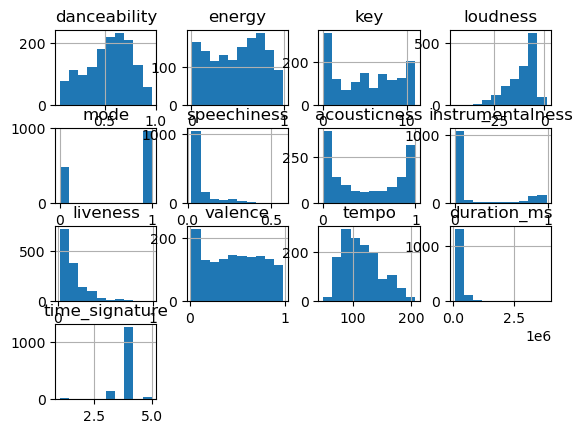

In [115]:
df.hist()

In [125]:
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
eucl = pd.DataFrame(pairwise_distances(df_sk_pre), 
                    index=df.index, 
                    columns=df.index)
eucl

name_art_id                                         All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA  \
name_art_id                                                                                           
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA                                            0.000000   
I've Got You Under My Skin - Remastered 1998Fra...                                         1.090730   
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...                                         1.229852   
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...                                         0.660358   
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...                                         1.135527   
...                                                                                             ...   
1812 Festival Overture, Op. 49: 1812 Overture, ...                                         1.500127   
Winter Fragments pour ensemble instrumental, so...                                         1.292083   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...                                         1.745089   
Serenade For Strings In E, Op.22, B. 52: 1. Mod...                                         1.444375   
Ravel: Boléro, M. 81Maurice Ravel7E1ErYYCn0lYjH...                                         1.201214   

name_art_id                                         I've Got You Under My Skin - Remastered 1998Frank Sinatra3aEJMh1cXKEjgh52claxQp  \
name_art_id                                                                                                                           
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA                                              1.090730                                 
I've Got You Under My Skin - Remastered 1998Fra...                                           0.000000                                 
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...                                           0.902891                                 
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...                                           0.726950                                 
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...                                           0.637883                                 
...                                                                                               ...                                 
1812 Festival Overture, Op. 49: 1812 Overture, ...                                           1.185352                                 
Winter Fragments pour ensemble instrumental, so...                                           1.106635                                 
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...                                           1.764385                                 
Serenade For Strings In E, Op.22, B. 52: 1. Mod...                                           1.188811                                 
Ravel: Boléro, M. 81Maurice Ravel7E1ErYYCn0lYjH...                                           1.019303                                 

name_art_id                                         Smoke Gets In Your EyesThe Platters307XEC1IUwUs9ojlEFwH7f  \
name_art_id                                                                                                     
All Shook UpElvis Presley5ueyLj6e6oVaTY0KQ6yLaA                                              1.229852           
I've Got You Under My Skin - Remastered 1998Fra...                                           0.902891           
Smoke Gets In Your EyesThe Platters307XEC1IUwUs...                                           0.000000           
What'd I Say, Pt. 1 & 2Ray Charles5yQ9iMZXGcr5r...                                           0.969024           
Dream A Little Dream Of MeElla Fitzgerald3vFVS2...                                           0.651341           
...                                                                                               ...           


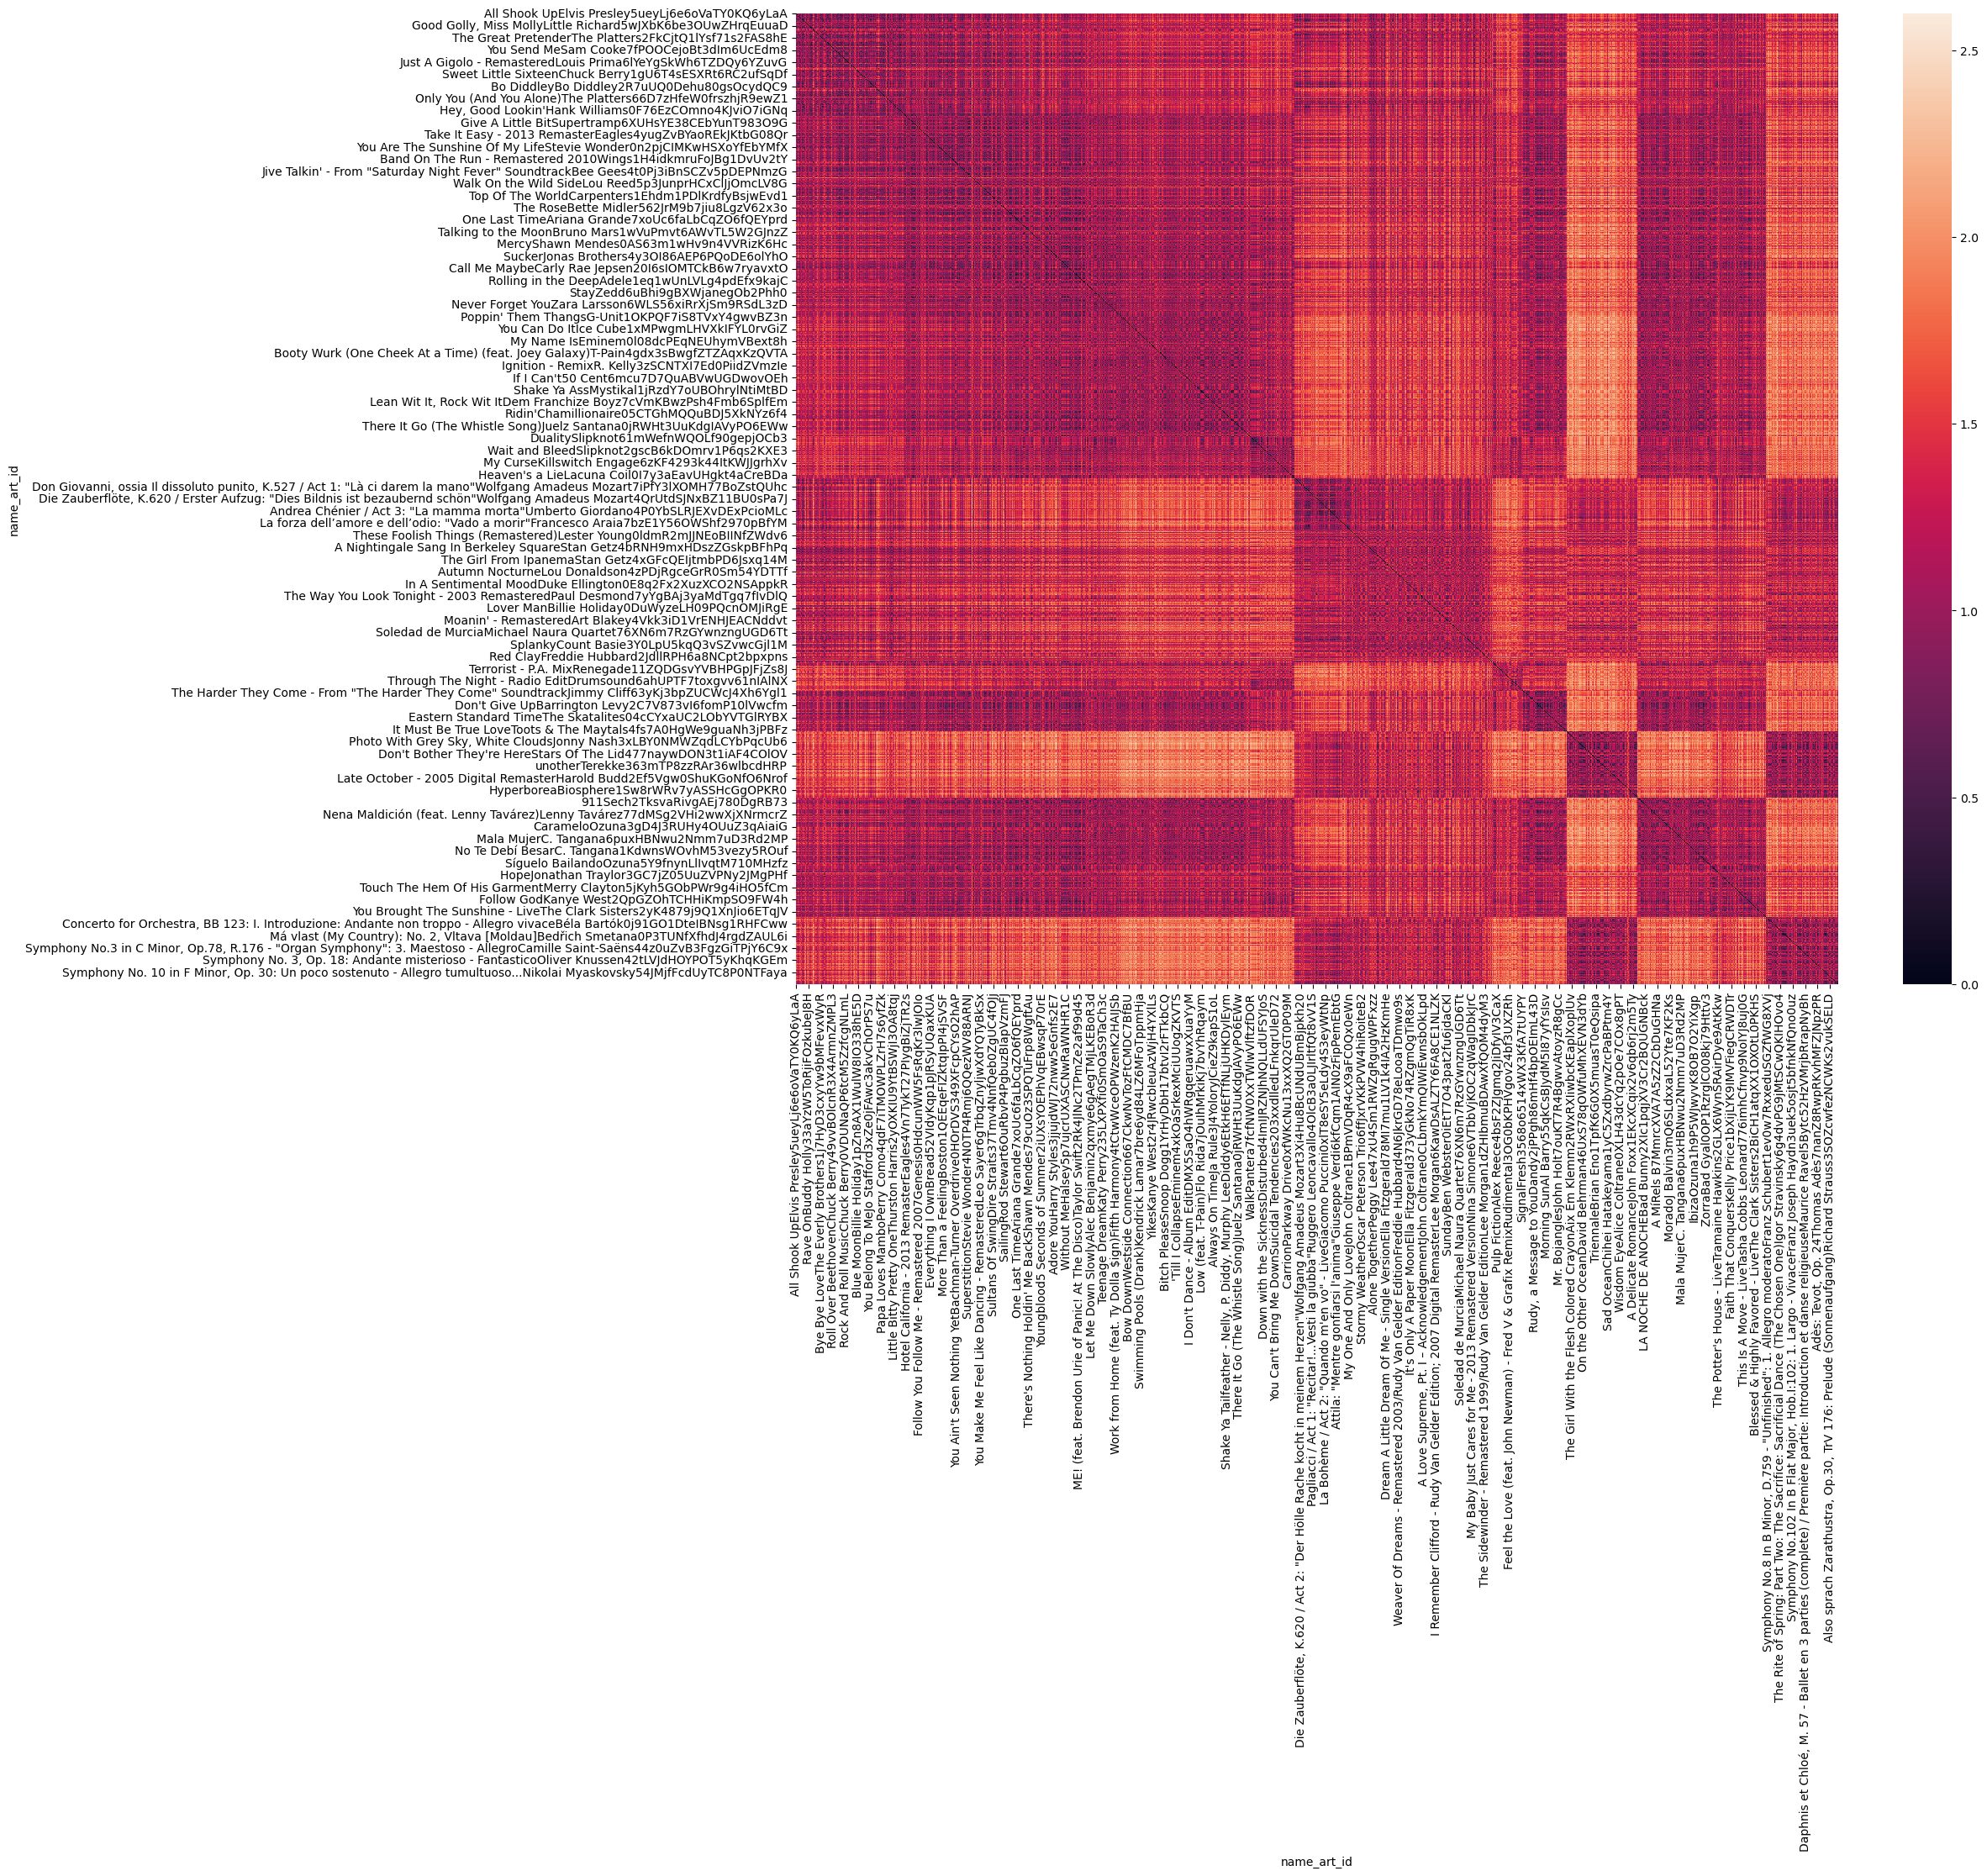

In [126]:
import seaborn as sns
plt.subplots(figsize=(20, 15))
sns.heatmap(eucl);

C:\Users\piotr\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


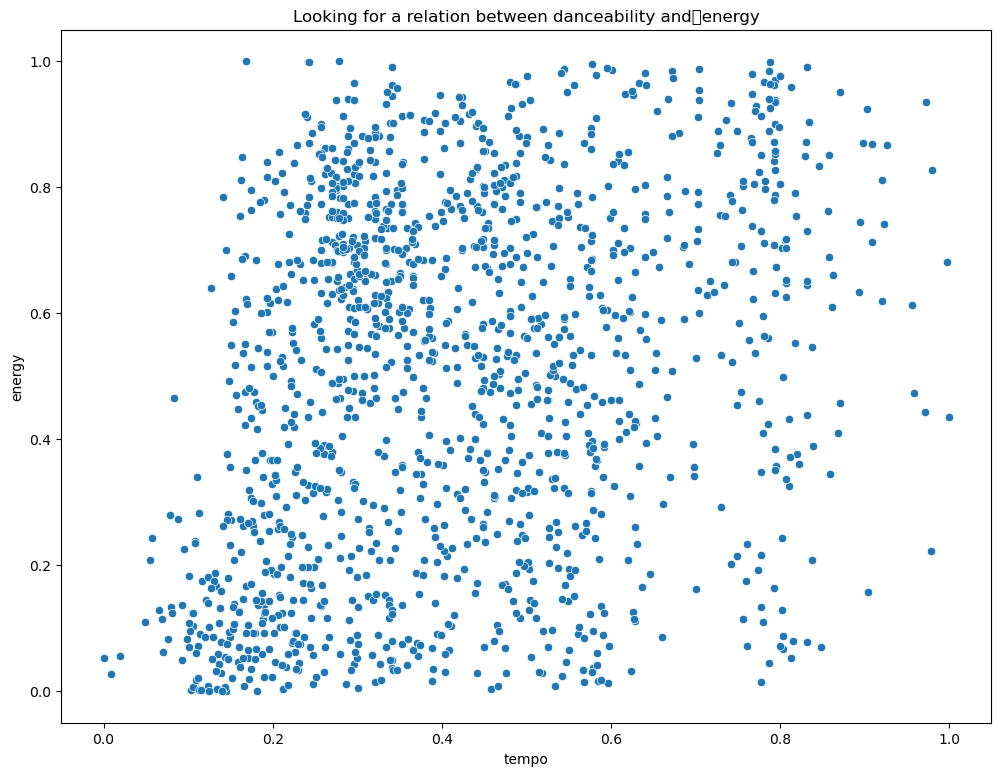

In [136]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(data=music_tab, x='tempo', y='energy')
plt.title('Looking for a relation between danceability and	energy')
plt.show()

In [138]:
from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species.
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_sk_pre)

KMeans(n_clusters=10)

In [140]:
kmeans.cluster_centers_

array([[6.57692825e-01, 7.07899582e-01, 1.15415020e-01, 8.23476024e-01,
        1.00000000e+00, 1.78294689e-01, 1.77005936e-01, 4.29892350e-02,
        1.72321441e-01, 6.16685132e-01, 4.52749898e-01, 7.42391304e-01],
       [2.14362319e-01, 1.44045079e-01, 4.12953060e-01, 5.01310394e-01,
        1.00000000e+00, 3.42888965e-02, 9.17086454e-01, 8.43727813e-01,
        1.30677609e-01, 1.14461681e-01, 3.39121017e-01, 6.79738562e-01],
       [6.82164971e-01, 6.97934774e-01, 8.60606061e-01, 8.31022986e-01,
        3.33066907e-16, 1.83910697e-01, 1.32524196e-01, 5.60248662e-02,
        1.59876767e-01, 5.67903632e-01, 4.64627707e-01, 7.37500000e-01],
       [4.90700012e-01, 3.15300576e-01, 4.47107438e-01, 6.92832548e-01,
        5.55111512e-16, 5.75861729e-02, 7.88243391e-01, 3.51128020e-02,
        1.52572285e-01, 3.99907716e-01, 4.11732035e-01, 7.25000000e-01],
       [6.56764994e-01, 7.03202437e-01, 7.13833992e-01, 8.32709576e-01,
        1.00000000e+00, 1.67912760e-01, 1.08109987e-01, 4.69

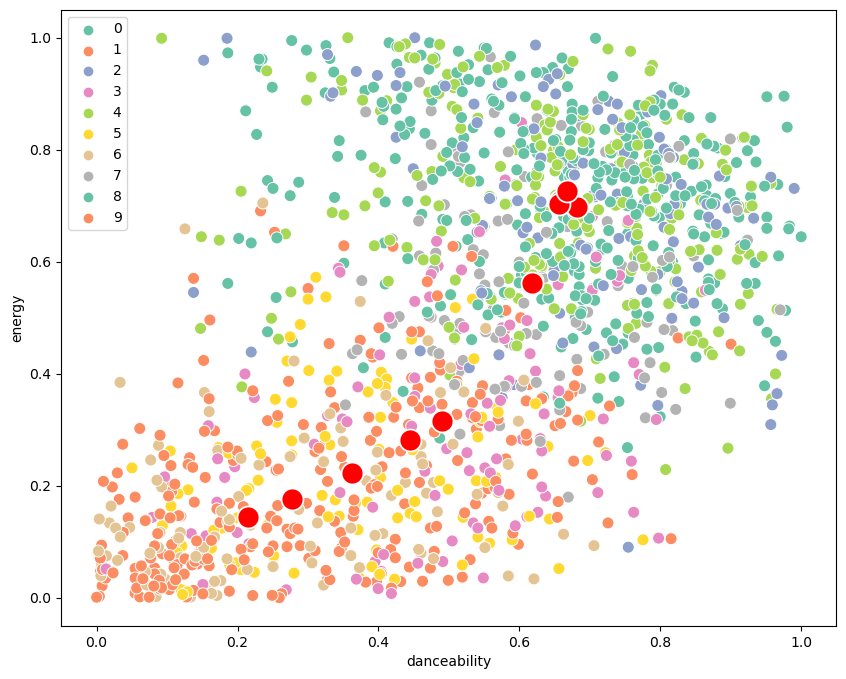

In [142]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability', 'energy',	'key',	'loudness', 'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo', 'time_signature']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(df_sk_pre)
plot_data.columns = ['danceability', 'energy',	'key',	'loudness', 'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo', 'time_signature']
plot_data['cluster'] = kmeans.labels_

sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='red', s=250)
plt.show()